Importamos librerías

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import cond

## Pregunta 1 ##

Queremos calcular una aproximación de la derivada de $f(x) = \sin(2\pi x)$. Primero recordemos las cotas teóricas vistas en clases.

Hacia adelante:
$$f'(x) \approx \frac{f(x + h) - f(x)}{h} \quad \text{(error del orden de } \mathcal{O}(h) \text{)}$$

Hacia atrás:
$$f'(x) \approx \frac{f(x) - f(x - h)}{h} \quad \text{(error del orden de } \mathcal{O}(h) \text{)}$$

Centradas:
$$f'(x) \approx \frac{f(x + h) - f(x - h)}{2h} \quad \text{(error del orden de } \mathcal{O}(h^2) \text{)}$$

Para el código recordemos que $f'(x) = 2\pi \cos(2\pi x)$ e implementemos lo solicitado

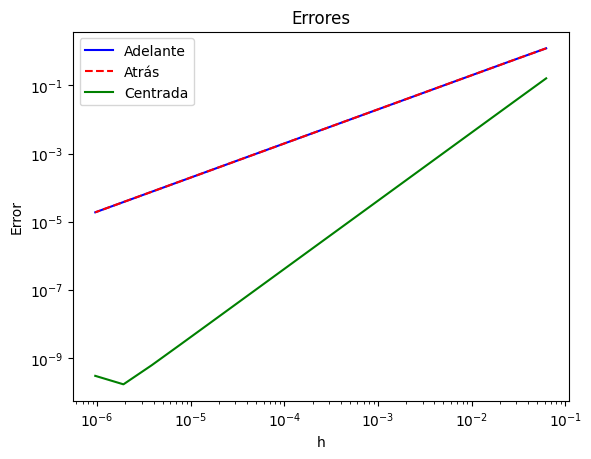

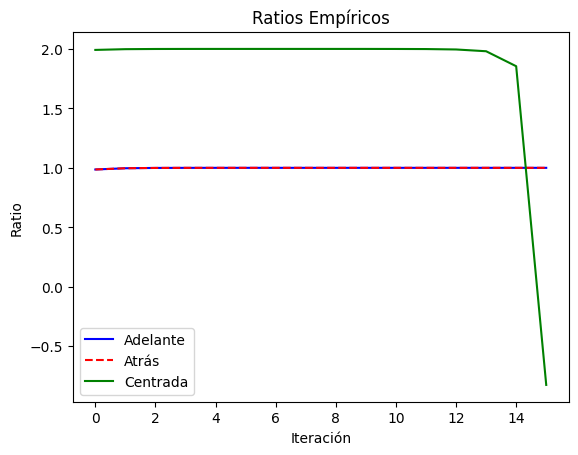

In [13]:
def f(x):
    return np.sin(2*np.pi*x)

def fprima(x):
    return 2*np.pi*np.cos(2*np.pi*x)

def empirical(errors, hs):
    return [(np.log(errors[i-1]) - np.log(errors[i])) / (np.log(hs[i-1]) - np.log(hs[i])) for i in range(1, len(errors))]

a = -1
b = 1

hs = [2**-n for n in range(4, 21)]
errorfw = []
errorbw = []
errorcd = []

for h in hs:
    x = np.arange(a, b + h, h)
    x_interior = x[1:-1]
    
    fprima_fw = (f(x[1:-1])-f(x[:-2]))/h
    fprima_bw = (f(x[2:])-f(x[1:-1]))/h
    fprima_cd = (f(x[2:])-f(x[:-2]))/(2 * h)
    df_exact = fprima(x[1:-1])
    
    errorfw.append(np.max(np.abs(fprima_fw - df_exact)))
    errorbw.append(np.max(np.abs(fprima_bw - df_exact)))
    errorcd.append(np.max(np.abs(fprima_cd - df_exact)))
    
ratiofw = empirical(errorfw, hs)
ratiobw = empirical(errorbw, hs)
ratiocd = empirical(errorcd, hs)

plt.plot(hs, errorfw, label='Adelante', color='blue')
plt.plot(hs, errorbw, label='Atrás', color='red', linestyle = '--')
plt.plot(hs, errorcd, label='Centrada', color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.title('Errores')
plt.show()

plt.plot(ratiofw, label='Adelante', color='blue')
plt.plot(ratiobw, label='Atrás', color='red', linestyle = '--')
plt.plot(ratiocd, label='Centrada', color='green')
plt.xlabel('Iteración')
plt.ylabel('Ratio')
plt.legend()
plt.title('Ratios Empíricos')
plt.show()

Podemos notar que los errores van decreciendo al disminuir el $h$, lo cual tiene sentido ya que se provee de una mejor aproximación. Aún así, para $h$ pequeño para el esquema de diferencias centradas tiene una leve subida el error al final, esto se debe a la inestabilidad del esquema.

Por otra parte, los ratios empíricos del error hacen sentido con lo que dice la teoría, ya que presentan convergencia lineal y cuadrática (orden 1 y 2) respectivamente.

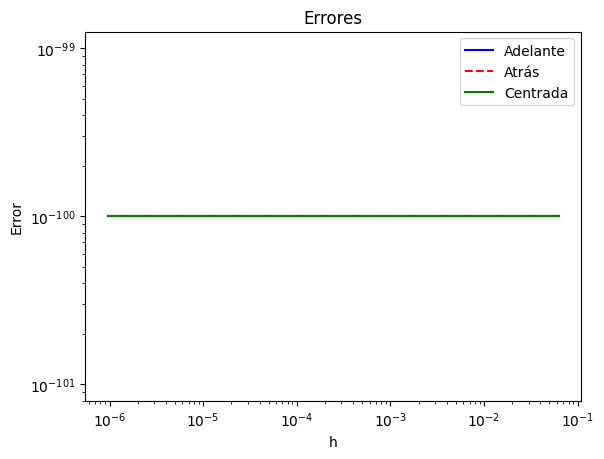

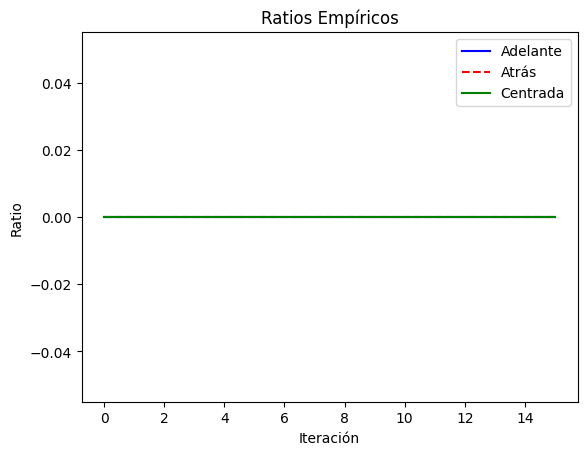

In [14]:
def f(x):
    return 2

def fprima(x):
    return 0

def empirical(errors, hs):
    return [(np.log(errors[i-1]) - np.log(errors[i])) / (np.log(hs[i-1]) - np.log(hs[i])) for i in range(1, len(errors))]

a = -1
b = 1

hs = [2**-n for n in range(4, 21)]
errorfw = []
errorbw = []
errorcd = []

for h in hs:
    x = np.arange(a, b + h, h)
    x_interior = x[1:-1]
    
    fprima_fw = (f(x[1:-1])-f(x[:-2]))/h
    fprima_bw = (f(x[2:])-f(x[1:-1]))/h
    fprima_cd = (f(x[2:])-f(x[:-2]))/(2 * h)
    df_exact = fprima(x[1:-1])
    
    errorfw.append(np.max(np.abs(fprima_fw - df_exact)))
    errorbw.append(np.max(np.abs(fprima_bw - df_exact)))
    errorcd.append(np.max(np.abs(fprima_cd - df_exact)))
    
errorfw = np.maximum(errorfw, 1e-100)
errorbw = np.maximum(errorfw, 1e-100)
errorcd = np.maximum(errorfw, 1e-100)

ratiofw = empirical(errorfw, hs)
ratiobw = empirical(errorbw, hs)
ratiocd = empirical(errorcd, hs)

plt.plot(hs, errorfw, label='Adelante', color='blue')
plt.plot(hs, errorbw, label='Atrás', color='red', linestyle = '--')
plt.plot(hs, errorcd, label='Centrada', color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.title('Errores')
plt.show()

plt.plot(ratiofw, label='Adelante', color='blue')
plt.plot(ratiobw, label='Atrás', color='red', linestyle = '--')
plt.plot(ratiocd, label='Centrada', color='green')
plt.xlabel('Iteración')
plt.ylabel('Ratio')
plt.legend()
plt.title('Ratios Empíricos')
plt.show()

Como en este caso la expansión de Taylor tiene forma exacta para la parte analizada (igual de trivial que la función), se espera que el error sea cero. Y los experimentos prácticos respaldan dicha teoría como se puede ver en los gráficos, ya que el error que dice tener fue el que le puse como error mínimo para que al calcular el ratio empírico no diera error al hacer logaritmo de 0, pero básicamente el error es de 0 sin importar cual sea el tamaño del $h$

## Pregunta 2

#### Diferencias hacia adelante:

Primero tenemos que
$$u_i' = \frac{u_{i+1} - u_i}{h}$$
Y para $u''$ entiendo del enunciado que lo calculamos de la forma usual, por lo que
$$u_i'' = \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2}$$
Por lo que resulta que
$$L_hu_i =-\frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} + b\frac{u_{i+1} - u_i}{h} + c \cdot u_i$$
Y de las condiciones de frontera, $u_0 = 1$ y $u_N = 2$, por lo que para sus vecinos se tiene que
$$L_hu_1 =-\frac{u_{i+1} - 2u_i + 1}{h^2} + b\frac{u_{i+1} - u_i}{h} + c \cdot u_i$$
$$L_hu_i =-\frac{2 - 2u_i + u_{i-1}}{h^2} + b\frac{2 - u_i}{h} + c \cdot u_i$$

#### Diferencias centradas:

Primero tenemos que
$$u_i' = \frac{u_{i+1} - u_{i-1}}{2h}$$
Y para $u''$
$$u_i'' = \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2}$$
Por lo que resulta que
$$L_hu_i =-\frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} + b\frac{u_{i+1} - u_{i-1}}{2h} + c \cdot u_i$$
Y de las condiciones de frontera, $u_0 = 1$ y $u_N = 2$, por lo que para sus vecinos se tiene que
$$L_hu_1 =-\frac{u_{i+1} - 2u_i + 1}{h^2} + b\frac{u_{i+1} - 1}{2h} + c \cdot u_i$$
$$L_hu_{N-1} =-\frac{2 - 2u_i + u_{i-1}}{h^2} + b\frac{2 - u_{i-1}}{2h} + c \cdot u_i$$

Ahora veamos que las discretizaciones son consistentes

Comenzemos por recordar las expansiones de Taylor

$$u_{i+1} = u(x_i + h) = u(x_i) + h u'(x_i) + \frac{h^2}{2} u''(x_i) + \frac{h^3}{6} u^{(3)}(x_i) + \mathcal{O}(h^4)$$
$$u_{i-1} = u(x_i - h) = u(x_i) - h u'(x_i) + \frac{h^2}{2} u''(x_i) - \frac{h^3}{6} u^{(3)}(x_i) + \mathcal{O}(h^4)$$

Sumando ambas resulta que

$$h^2 \cdot u''(x_i) = u(x_i + h) + u(x_i - h) - 2 u(x_i) - 2 \mathcal{O}(h^4)$$

Y por tanto

$$u''(x_i) = \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} + \mathcal{O}(h^2)$$

#### Diferencias hacia adelante:

De la expansión de Taylor para $u(x_i + h)$ se tiene que

$$h u_i'(x_i) = u_{i+1} - u_i - \mathcal{O}(h^2)$$

Y entonces 

$$u_i' = \frac{u_{i+1} - u_i}{h} + \mathcal{O}(h)$$

Por definición

$$\max_{i \in \{1, \dots, N\}}|\mathcal{L}u(x_i) - [L_h R_h u]_i| = \max_{i \in \{1, \dots, N\}}|-u''(x_i) + bu'(x_i) + cu(x_i) + \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} - b\frac{u_{i+1} - u_i}{h} - c \cdot u_i|$$

Pero de las cotas anteriores

$$\max_{i \in \{1, \dots, N\}}|\mathcal{L}u(x_i) - [L_h R_h u]_i| = \max_{i \in \{1, \dots, N\}}|-u''(x_i) + bu'(x_i) + cu(x_i) + u''(x_i) + \mathcal{O}(h^2) - bu'(x_i) - b\mathcal{O}(h) - c \cdot u_i|$$

Y entonces 

$$\max_{i \in \{1, \dots, N\}}|\mathcal{L}u(x_i) - [L_h R_h u]_i| = \max_{i \in \{1, \dots, N\}}|\mathcal{O}(h^2) + \mathcal{O}(h)| \leq Ch^1$$

De lo que se concluye que el esquema es consistente de orden $1$

#### Diferencias centradas:

De la expansión de Taylor para $u(x_i + h)$ y $u(x_i + h)$ se tiene que

$$2h u_i'(x_i) = u_{i+1} + u_{i-1} - 2u_i - \mathcal{O}(h^3)$$

Y entonces 

$$u_i' = \frac{u_{i+1} - 2u_i + u_{i-1}}{2h} + \mathcal{O}(h^2)$$

Por definición

$$\max_{i \in \{1, \dots, N\}}|\mathcal{L}u(x_i) - [L_h R_h u]_i| = \max_{i \in \{1, \dots, N\}}|-u''(x_i) + bu'(x_i) + cu(x_i) + \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} - b\frac{u_{i+1} - u_{i-1}}{2h} - c \cdot u_i|$$

Pero de las cotas anteriores

$$\max_{i \in \{1, \dots, N\}}|\mathcal{L}u(x_i) - [L_h R_h u]_i| = \max_{i \in \{1, \dots, N\}}|-u''(x_i) + bu'(x_i) + cu(x_i) + u''(x_i) + \mathcal{O}(h^2) - bu'(x_i) - b\mathcal{O}(h^2) - c \cdot u_i|$$

Y entonces 

$$\max_{i \in \{1, \dots, N\}}|\mathcal{L}u(x_i) - [L_h R_h u]_i| = \max_{i \in \{1, \dots, N\}}|\mathcal{O}(h^2) + \mathcal{O}(h^2)| \leq Ch^2$$

De lo que se concluye que el esquema es consistente de orden $2$

Ahora implementemos el cálculo para el condicionamiento de la matriz $L_h$ para diferencias centradas, para esto reescribimos la fórmula anterior de una forma más conveniente

$$L_hu_i =-\frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} + b\frac{u_{i+1} - u_{i-1}}{2h} + c \cdot u_i = u_{i-1}\left(\frac{-1}{h^2} - \frac{b}{2h}\right) + u_i \left( \frac{2}{h^2} + c\right) + u_{i+1} \left(\frac{-1}{h^2} + \frac{b}{2h}\right)$$

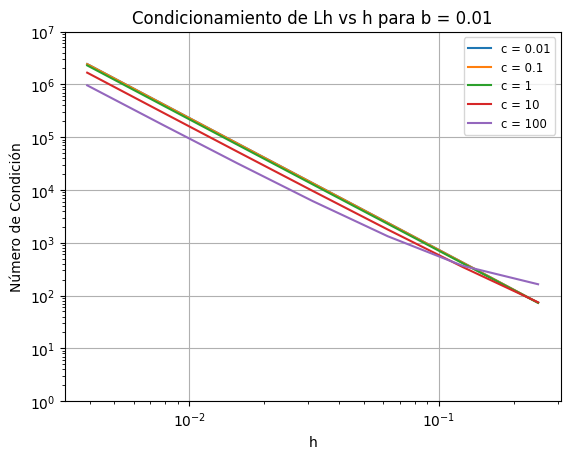

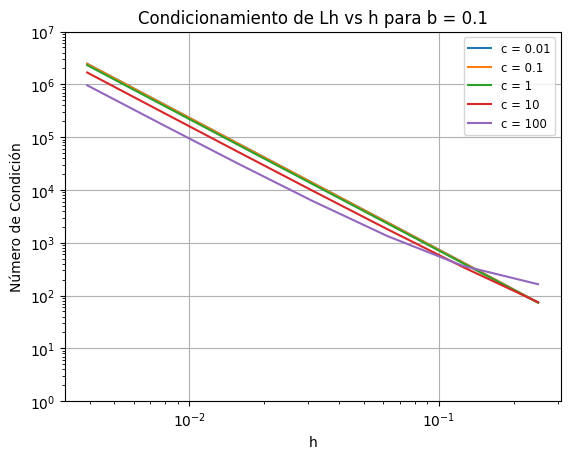

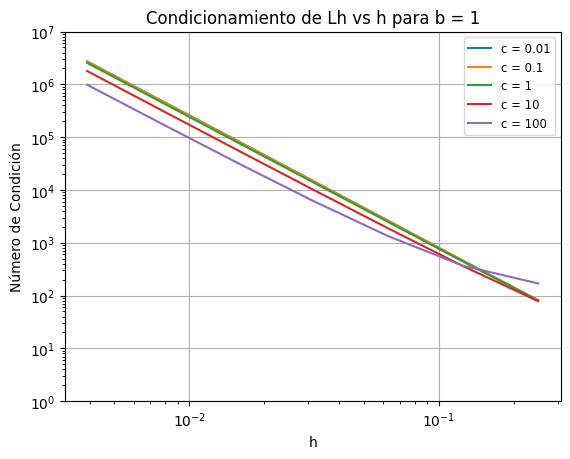

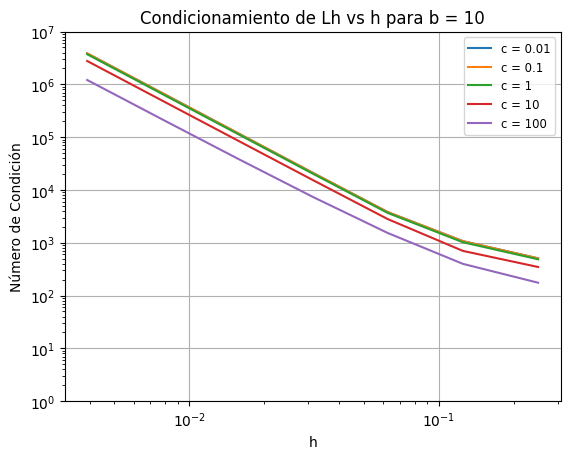

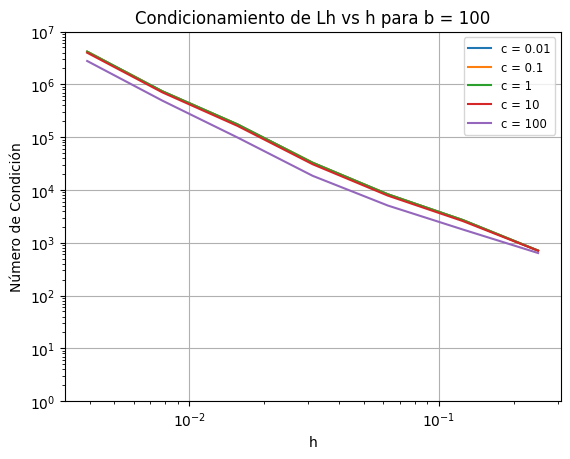

In [16]:
def discretizar(N, b, c):
    h = 1/(N - 1)
    L = np.zeros((N, N))
    for i in range(1, N):
        L[i][i] = 2/h**2 + c
        if i > 0:
            L[i][i-1] = -1/h**2 - b/(2*h)
        if i < N-1:
            L[i][i+1] = -1/h**2 + b/(2*h)
    L[0][0] = 1
    L[N-1][N-1] = 1
    return L

for b in [0.01, 0.1, 1, 10, 100]:
    for c in [0.01, 0.1, 1, 10, 100]:
        C = []
        H = []
        for n in range(2, 9):
            h = 2**(-n)
            N = int(1/h) + 1
            Lh = discretizar(N, b, c)
            C.append(cond(Lh))
            H.append(h)
        plt.plot(H, C, label=f"c = {c}")

    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("h")
    plt.ylabel("Número de Condición")
    plt.ylim(1, 10**7)
    plt.title(f"Condicionamiento de Lh vs h para b = {b}")
    plt.legend(fontsize="small", loc="best")
    plt.grid(True)
    plt.show()


Consideremos la función de comparación $\varphi(x) = \frac{\|f\|_{\infty, h}}{2}x^2$ y consideramos una constante $M$ tal que lo acotemos por $\varphi(x) \leq M\|f\|_{\infty, h} \in [0, 1]$ (la cual existe puesto que es una función continua en un compacto).

Por la definición de nuestro operador tenemos que $L_h \varphi_h = \|f\|_{\infty, h} + c\frac{\|f\|_{\infty, h}}{2}x^2$. Entonces, al aplicar el operador $L_h$ a $u_h + \varphi_h$, resulta que

$$
L_h(u_h + \varphi_h) = L_h u_h + L_h \varphi_h = f_h + \left(\|f\|_{\infty, h} + c\frac{\|f\|_{\infty, h}}{2}x^2\right) \geq 0.
$$

Luego, aplicando el principio del máximo discreto, obtenemos

$$
\max_{(0, 1)_h} u_h \leq \max_{(0, 1)_h} (u_h + \varphi_h) 
\overset{\text{DMP}}{\leq} \max_{\{0, 1\}_h} (u_h + \varphi_h) 
= \|g_h\|_{\infty, h} + \max_{\{0, 1\}_h} \varphi_h \leq 2 + M\|f\|_{\infty, h} + c\frac{\|f\|_{\infty, h}}{2}
$$

Esto implica

$$
\max_{\Omega_h} u_h \leq 2 + \left(M + \frac{c}{2}\right) \|f\|_{\infty, h}
$$

Repitiendo el argumento anterior para $-u_h$ se obtiene una cota inferior análoga. Juntando ambas resulta que

$$
\|u_h\|_{\infty, h} \leq 2 + \left(M + \frac{c}{2}\right) \|L_h u_h\|_{\infty, h}
$$

Esto demuestra que el sistema definido por $L_h$ es estable. Así, por el Teorema de Equivalencia de Lax, como el operador es consistente y estable, entonces se concluye que debe ser convergente, esto es, la solución discreta obtenida con la matriz $L_h$ converge a la solucion continua. 

Ahora implementemos el método de las soluciones manufacturadas. Consideremos nuestra función auxiliar como
$$u_{ex}(x) = \sin\left(\pi x\right) + x + 1$$
Notemos que cumple las condiciones de borde puesto que $u_{ex}(0) = \sin\left(0\right) + 0 + 1 = 1$ y $u_{ex}(1) = \sin\left(\pi\right) + 1 + 1 = 2$

Ahora calculemos $f = \mathcal{L}u_{ex}$. Se tiene que

$$f = \mathcal{L}u_{ex} = -u_{ex}'' + b u_{ex}' + c u_{ex} = - \pi^2 \sin\left(\pi x\right) + b \pi \cos\left(\pi x\right) + b  + c \sin\left(\pi x\right) + cx + c$$

Agrupando términos

$$f = (c - \pi^2) \sin\left(\pi x\right) + b \pi \cos\left(\pi x\right) + cx + b + c$$

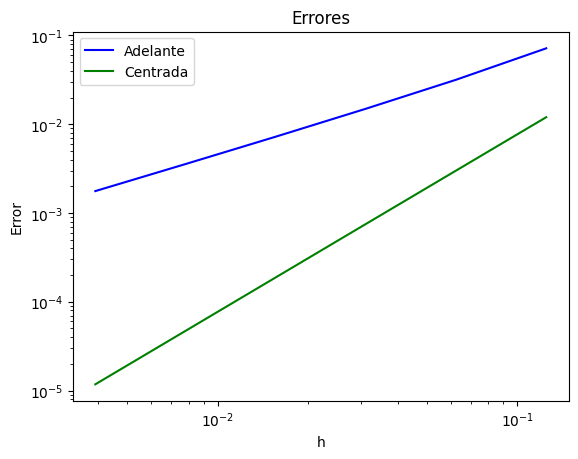

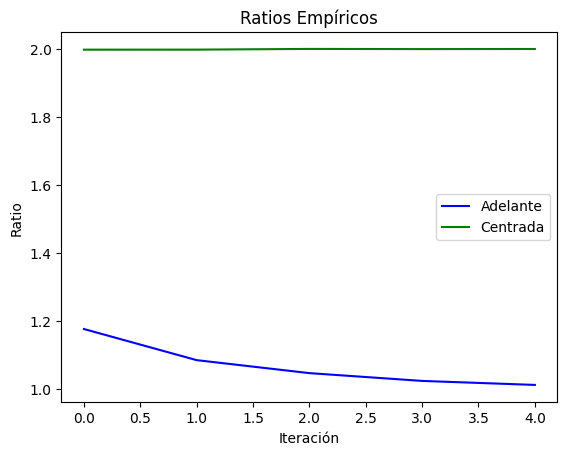

In [ ]:
def uex(x):
    return np.sin(np.pi * x) + x + 1

def Luex(x):
    res = (np.pi**2 + c) * np.sin(np.pi * x) + b * np.pi * np.cos(np.pi * x) + c * x + b + c
    res[0] = 1
    res[-1] = 2
    return res

def centradas(N, h, b, c):
    L = np.zeros((N, N))
    for i in range(1, N-1):
        L[i, i-1] = -1/h**2 - b/(2*h)
        L[i, i]   = 2/h**2 + c
        L[i, i+1] = -1/h**2 + b/(2*h)
    L[0, 0] = 1
    L[N-1, N-1] = 1
    return L

def adelante(N, h, b, c):
    L = np.zeros((N, N))
    for i in range(1, N-1):
        L[i, i-1] = -1/h**2
        L[i, i]   = 2/h**2 - b/h + c
        L[i, i+1] = -1/h**2 + b/h
    L[0, 0] = 1
    L[N-1, N-1] = 1
    return L

def empirical(errors, hs):
    return [(np.log(errors[i-1]) - np.log(errors[i])) / (np.log(hs[i-1]) - np.log(hs[i])) for i in range(1, len(errors))]

b = 1
c = 1

hs = [2**(-n) for n in range(3, 9)]
errorfw = []
errorcd = []

for h in hs:
    x = np.arange(0, 1 + h, h)
    N = len(x)
    
    usol = uex(x)
    fex = Luex(x)
    
    Lcd = centradas(N, h, b, c)
    Lfw = adelante(N, h, b, c)
    
    u_centrada = np.linalg.solve(Lcd, fex)
    u_adelante = np.linalg.solve(Lfw, fex)
    
    errorcd.append(np.max(np.abs(u_centrada - usol)))
    errorfw.append(np.max(np.abs(u_adelante - usol)))
    

ratiofw = empirical(errorfw, hs)
ratiocd = empirical(errorcd, hs)

plt.plot(hs, errorfw, label='Adelante', color='blue')
plt.plot(hs, errorcd, label='Centrada', color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('Error')
plt.legend()
plt.title('Errores')
plt.show()

plt.plot(ratiofw, label='Adelante', color='blue')
plt.plot(ratiocd, label='Centrada', color='green')
plt.xlabel('Iteración')
plt.ylabel('Ratio')
plt.legend()
plt.title('Ratios Empíricos')
plt.show()

La tasa de convergencia es cuadrática para el esquema centrado y es lineal para el esquema hacia adelante, por lo cual cumple según lo esperado por la teoría.

## Pregunta 3

Recordemos que
$$\Delta u = \frac{\partial^2 u}{\partial^2 x}$$
Y por tanto usando diferencias centradas se tiene que para el Laplaciano resulta que
$$L_h u^n_{i,j} = \frac{u^n_{i+1,j} - 2u^n_{i,j} + u^n_{i-1,j}}{h^2} + \frac{u^n_{i,j+1} - 2u^n_{i,j} + u^n_{i,j-1}}{h^2}$$

### Esquema explícito en el tiempo
Tenemos que
$$\int_{t^n}^{t^{n+1}} L_h u_h ds \approx \tau L_h u_h^n$$
Y entonces
$$u_h^{n+1} - u_h^n = \tau L_h u_h^n$$
Y despejando y considerando el operador $L_h$ resulta que
$$u_h^{n+1} = u_h^n + \frac{\tau \mu}{h^2}\left(u^n_{i+1,j} + u^n_{i-1,j} + u^n_{i,j+1} + u^n_{i,j-1} - 4u^n_{i,j}\right)$$

### Esquema implícito en el tiempo

Tenemos que
$$\int_{t^n}^{t^{n+1}} L_h u_h ds \approx \tau L_h u_h^{n+1}$$
Y entonces
$$u_h^{n+1} - u_h^n = \tau L_h u_h^{n+1}$$
Y despejando y considerando el operador $L_h$ resulta que
$$u_h^{n+1} - \frac{\tau \mu}{h^2}\left(u^{n+1}_{i+1,j} + u^{n+1}_{i-1,j} + u^{n+1}_{i,j+1} + u^{n+1}_{i,j-1} - 4u^{n+1}_{i,j}\right) = u_h^n$$

Tal como en el apartado anterior veamos la consistencia a través del error local usando desarrollos de Taylor. Comencemos por el esquema explícito, y por la derivada temporal

$$u(x_{i, j}, t + \tau) = u(x_{i, j}, t) + \tau \frac{\partial u}{\partial t}(x_{i, j}, t) + \mathcal{O}(\tau^2)$$

Por lo  que

$$\frac{u_{i, j}^{n+1} - u_{i, j}^n}{\tau} = \frac{\partial u}{\partial t}(x_{i, j}, t) + \mathcal{O}(\tau)$$

Para la derivada espacial

$$\frac{u_{i+1, j}^n - 2u_{i, j}^n + u_{i-1, j}^n}{h^2} = \frac{\partial^2 u}{\partial x^2}(x_{i, j}, t) + \mathcal{O}(h^2)$$

$$\frac{u_{i, j+1}^n - 2u_{i, j}^n + u_{i, j-1}^n}{h^2} = \frac{\partial^2 u}{\partial y^2}(x_{i, j}, t) + \mathcal{O}(h^2)$$

Así, el residuo total resulta, considerando desigualdad triangular por lo que basta sumar los errores, en (imposible poner la fórmula explícita y que quede ordenado, pero se entiende)

$$\mathcal{O}(\tau) + \mathcal{O}(h^2)$$

Si consideramos una discretización universal $\tau = h$, se tiene que el error es $\mathcal{O}(h)$, y por tanto el esquema explícito es consistente.

Ahora veamos el esquema implícito, tenemos que el error temporal resulta en

$$u(x_{i, j}, t + \tau) = u(x_j, t) + \tau \frac{\partial u}{\partial t}(x_j, t) + \mathcal{O}(\tau^2)$$

Entonces

$$\frac{u_{i, j}^{n+1} - u_{i, j}^n}{\tau} = \frac{\partial u}{\partial t}(x_{i, j}, t) + \mathcal{O}(\tau)$$

Ahora la aproximación espacial es en $t + \tau$ por lo que tenemos que

$$\frac{u_{i+1, j}^{n+1} - 2u_{i, j}^{n+1} + u_{i-1, j}^{n+1}}{h^2} = \frac{\partial^2 u}{\partial x^2}(x_{i, j}, t + \tau) + \mathcal{O}(h^2)$$

$$\frac{u_{i, j+1}^{n+1} - 2u_{i, j}^{n+1} + u_{i, j-1}^{n+1}}{h^2} = \frac{\partial^2 u}{\partial y^2}(x_{i, j}, t + \tau) + \mathcal{O}(h^2)$$

Así, el residuo total resulta, considerando desigualdad triangular por lo que basta sumar los errores, en (imposible poner la fórmula explícita y que quede ordenado, pero se entiende)

$$\mathcal{O}(\tau) + \mathcal{O}(h^2)$$

Si consideramos una discretización universal $\tau = h$, se tiene que el error es $\mathcal{O}(h)$, y por tanto el esquema implícito también es consistente.

Ahora implementemos ambos esquemas

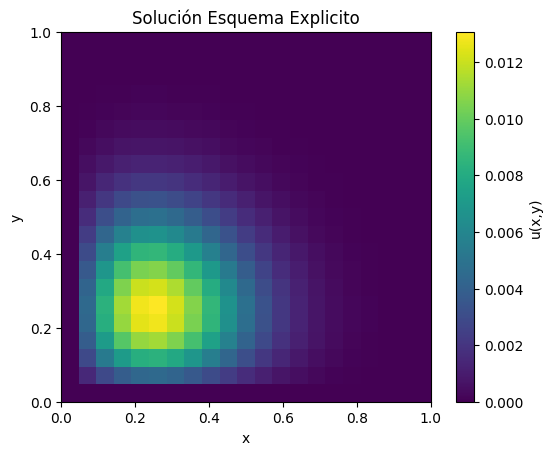

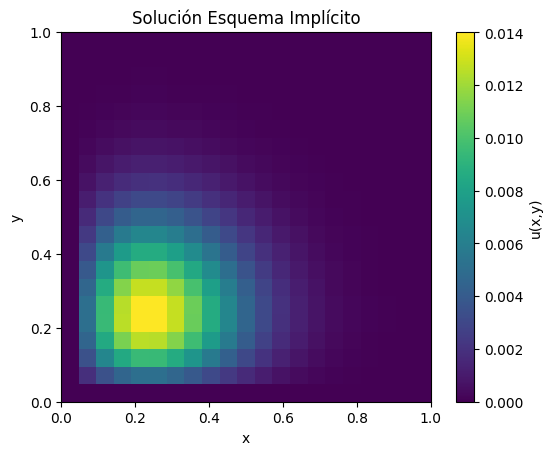

In [32]:
def backward_euler(mu, N, dt, T, h, u0):
    u = u0.copy()
    uflat = np.zeros(N*N)
    time = 0
    A = np.eye(N*N)
    c = dt*mu/h**2
    for i in range(N):
        for j in range(N):
            uflat[i + j*N] = u[i, j]
            if i == 0 or j == 0 or i == N-1 or j == N-1:
                continue
            A[i + j*N, i + (j-1)*N] -= c
            A[i + j*N, i + (j+1)*N] -= c
            A[i + j*N, i-1 + j*N] -= c
            A[i + j*N, i+1 + j*N] -= c
            A[i + j*N, i + j*N] += 4*c
            
    while time < T:
        uflat = np.linalg.solve(A, uflat)
        time += dt
    
    for i in range(N):
        for j in range(N):
            u[i, j] = uflat[i + j*N]
    
    return u

def forward_euler(mu, N, dt, T, h, u0):
    u = u0.copy()
    time = 0
    while time < T:
        du = np.zeros((N, N))
        for i in range(1, N-1):
            for j in range(1, N-1):
                du[i, j] += u[i+1, j]
                du[i, j] += u[i-1, j]
                du[i, j] += u[i, j+1]
                du[i, j] += u[i, j-1]
                du[i, j] -= 4*u[i, j]
        u = u + (mu*dt/h**2)*du
        time += dt
    return u

L = 1.0
mu = 0.05
N = 21
dt = 0.01
T = 0.5
xs = np.linspace(0, L, N)
ys = np.linspace(0, L, N)
h = L/(N-1)
#h = 0.05

u0 = np.zeros((N, N))
for i in range(1, N-1):
    for j in range(1, N-1):
        if np.sqrt(xs[i]**2 + ys[j]**2) < 0.2:
            u0[i, j] = 1

uexplicito = forward_euler(mu, N, dt, T, h, u0)
uimplicito = backward_euler(mu, N, dt, T, h, u0)

plt.imshow(uexplicito, extent=(0, 1, 0, 1), origin='lower', cmap='viridis')
plt.colorbar(label='u(x,y)')
plt.title('Solución Esquema Explicito')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.imshow(uimplicito, extent=(0, 1, 0, 1), origin='lower', cmap='viridis')
plt.colorbar(label='u(x,y)')
plt.title('Solución Esquema Implícito')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Notemos que tal como dice el enunciado me voy a restringir al espacio 1D, aunque es lo mismo pero sino siento que no me va a caber las fórmulas.

Para el esquema explícito se tiene que

$$u_j^{n+1} = u_j^n + \frac{\mu \tau}{h^2} (u_{j+1}^n - 2u_j^n + u_{j-1}^n)$$

Consideremos la solución

$$u_j^n = e^{i \xi j h}, \quad u_j^{n+1} = g(\xi) e^{i \xi j h}$$

De lo que resulta

$$g(\xi) e^{i \xi j h} = e^{i \xi j h} + \frac{\mu \tau}{h^2} \left(e^{i \xi (j+1)h} - 2e^{i \xi j h} + e^{i \xi (j-1)h} \right)$$

Dividimos por $e^{i \xi j h}$

$$g(\xi) = 1 + \frac{\mu \tau}{h^2} \left(e^{i \xi h} + e^{-i \xi h} - 2\right)$$

De la identidad $e^{i \xi h} + e^{-i \xi h} = 2\cos(\xi h)$ resulta

$$g(\xi) = 1 - 2\frac{\mu \tau}{h^2} (1 - \cos(\xi h))$$


Sabemos que $ \cos(\xi h) \in [-1, 1] $, así que $1 - \cos(\xi h) \in [0, 2]$, por lo que

$$g(\xi) \in \left[1 - 4\frac{\mu \tau}{h^2}, 1\right]$$

Para que el método sea estable queremos que $|g(\xi)| \leq 1 $, esto es

$$1 - 4\frac{\mu \tau}{h^2} \geq -1 \quad \Longrightarrow \quad \frac{\mu \tau}{h^2} \leq \frac{1}{2}$$

Despejando $\tau$ tenemos que

$$\tau \leq \frac{h^2}{2\mu}$$

Por lo que el esquema explícito será estable cuando se cumpla dicha condición.

Para el esquema implícito se tiene que

$$u_j^{n+1} = u_j^n + \frac{\mu \tau}{h^2} (u_{j+1}^{n+1} - 2u_j^{n+1} + u_{j-1}^{n+1})$$

Consideremos que

$$u_j^{n+1} = g(\xi) e^{i \xi j h}, \quad u_j^n = e^{i \xi j h}$$

Reemplazando

$$g(\xi) e^{i \xi j h} = e^{i \xi j h} + \frac{\mu \tau}{h^2} (g(\xi) e^{i \xi (j+1) h} - 2g(\xi) e^{i \xi j h} + g(\xi) e^{i \xi (j-1) h})$$

Dividimos por $e^{i \xi j h}$

$$g(\xi) = 1 + \frac{\mu \tau}{h^2} (g(\xi) e^{i \xi h} + g(\xi) e^{-i \xi h} - 2)$$

Factorizando

$$g(\xi) \left[1 - \frac{\mu \tau}{h^2} (e^{i \xi h} + e^{-i \xi h} - 2)\right] = 1$$

Entonces:

$$g(\xi) = \frac{1}{1 + 2\frac{\mu \tau}{h^2} (1 - \cos(\xi h))}$$

Dado que $ 1 - \cos(\xi h) \geq 0 $, se tiene

$$|g(\xi)| = \left|\frac{1}{1 + 2\frac{\mu \tau}{h^2}(1 - \cos(\xi h))}\right| \leq 1$$

Por lo que este esquema es incondicionalmente estable.

Ahora corramos 4 modelos, el primero que cumpla las condiciones (el anterior), el segundo que falle al solo cambiar el $h$, el tercero que falle al solo cambiar el $\tau$ y el último que cambie los dos (y que hubiesen fallado por si solos).

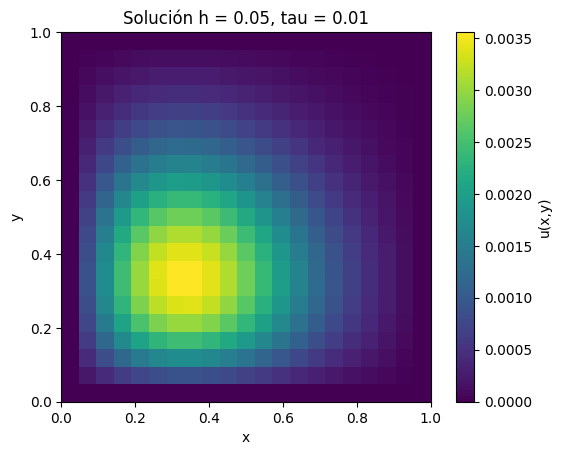

In [40]:
L = 1.0
mu = 0.05
h = 0.05
N = int(1/h) + 1
dt = 0.01
T = 1
xs = np.linspace(0, L, N)
ys = np.linspace(0, L, N)

u0 = np.zeros((N, N))
for i in range(1, N-1):
    for j in range(1, N-1):
        if np.sqrt(xs[i]**2 + ys[j]**2) < 0.2:
            u0[i, j] = 1

uexplicito = forward_euler(mu, N, dt, T, h, u0)

plt.imshow(uexplicito, extent=(0, 1, 0, 1), origin='lower', cmap='viridis')
plt.colorbar(label='u(x,y)')
plt.title(f'Solución h = {h}, tau = {dt}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

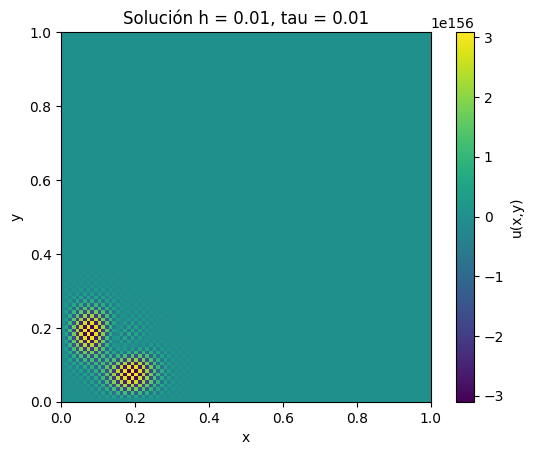

In [39]:
L = 1.0
mu = 0.05
h = 0.01
N = int(1/h) + 1
dt = 0.01
T = 1
xs = np.linspace(0, L, N)
ys = np.linspace(0, L, N)

u0 = np.zeros((N, N))
for i in range(1, N-1):
    for j in range(1, N-1):
        if np.sqrt(xs[i]**2 + ys[j]**2) < 0.2:
            u0[i, j] = 1

uexplicito = forward_euler(mu, N, dt, T, h, u0)

plt.imshow(uexplicito, extent=(0, 1, 0, 1), origin='lower', cmap='viridis')
plt.colorbar(label='u(x,y)')
plt.title(f'Solución h = {h}, tau = {dt}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

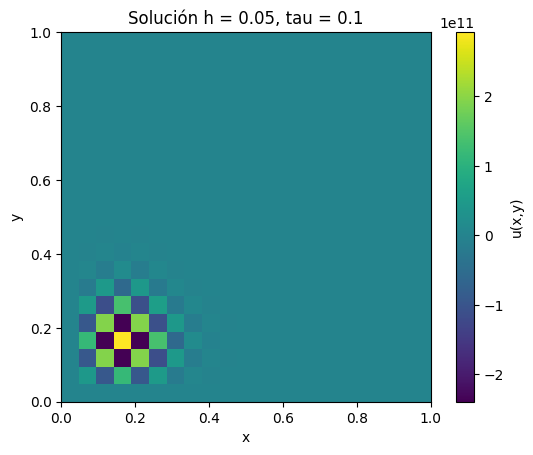

In [38]:
L = 1.0
mu = 0.05
h = 0.05
N = int(1/h) + 1
dt = 0.1
T = 1
xs = np.linspace(0, L, N)
ys = np.linspace(0, L, N)

u0 = np.zeros((N, N))
for i in range(1, N-1):
    for j in range(1, N-1):
        if np.sqrt(xs[i]**2 + ys[j]**2) < 0.2:
            u0[i, j] = 1

uexplicito = forward_euler(mu, N, dt, T, h, u0)

plt.imshow(uexplicito, extent=(0, 1, 0, 1), origin='lower', cmap='viridis')
plt.colorbar(label='u(x,y)')
plt.title(f'Solución h = {h}, tau = {dt}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

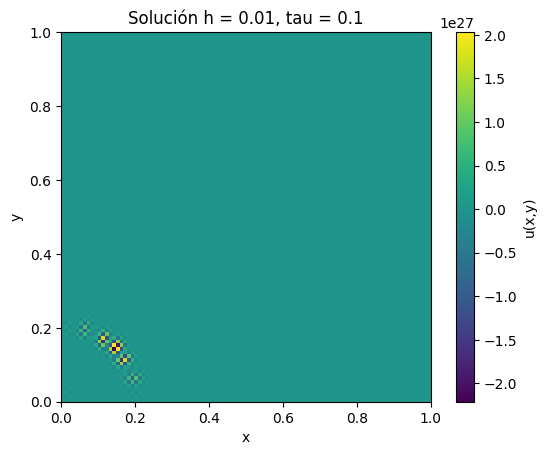

In [37]:
L = 1.0
mu = 0.05
h = 0.01
N = int(1/h) + 1
dt = 0.1
T = 1
xs = np.linspace(0, L, N)
ys = np.linspace(0, L, N)

u0 = np.zeros((N, N))
for i in range(1, N-1):
    for j in range(1, N-1):
        if np.sqrt(xs[i]**2 + ys[j]**2) < 0.2:
            u0[i, j] = 1

uexplicito = forward_euler(mu, N, dt, T, h, u0)

plt.imshow(uexplicito, extent=(0, 1, 0, 1), origin='lower', cmap='viridis')
plt.colorbar(label='u(x,y)')
plt.title(f'Solución h = {h}, tau = {dt}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Se puede ver que en las simulaciones en las cuales no se cumplía la desigualdad que nos asegura estabilidad, se vuelve inestable (como se esperaba). Lo anterior se debe a que las soluciones con el esquema explícito pueden ser inestables. Sin embargo, veamos que con un esquema implícito hasta este último mallado obtiene una solución estable.

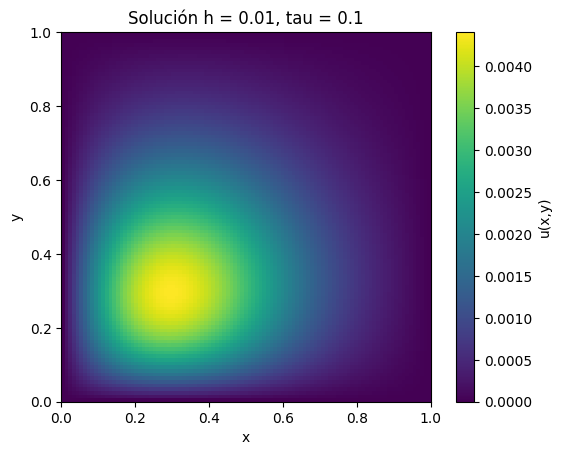

In [41]:
L = 1.0
mu = 0.05
h = 0.01
N = int(1/h) + 1
dt = 0.1
T = 1
xs = np.linspace(0, L, N)
ys = np.linspace(0, L, N)

u0 = np.zeros((N, N))
for i in range(1, N-1):
    for j in range(1, N-1):
        if np.sqrt(xs[i]**2 + ys[j]**2) < 0.2:
            u0[i, j] = 1

uimplicito = backward_euler(mu, N, dt, T, h, u0)

plt.imshow(uimplicito, extent=(0, 1, 0, 1), origin='lower', cmap='viridis')
plt.colorbar(label='u(x,y)')
plt.title(f'Solución h = {h}, tau = {dt}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()